## Wine Analysis
Utilizing wine data from https://archive.ics.uci.edu/ml/datasets/Wine+Quality can we determine the quality of wine on a zero to 10 scale using only chemical properties. 

In [1]:
import pandas as pd
import numpy as np
import math
import sklearn
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from collections import Counter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

### Data Preprocessing

In [2]:
wine_df = pd.read_csv('winequality-red.csv',sep=';')
wine_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
#check data types
wine_df.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [4]:
print('Total Number of NaN by column in winequality-red.csv:\n\n', wine_df.isnull().sum())

Total Number of NaN by column in winequality-red.csv:

 fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


Display Data Distributions

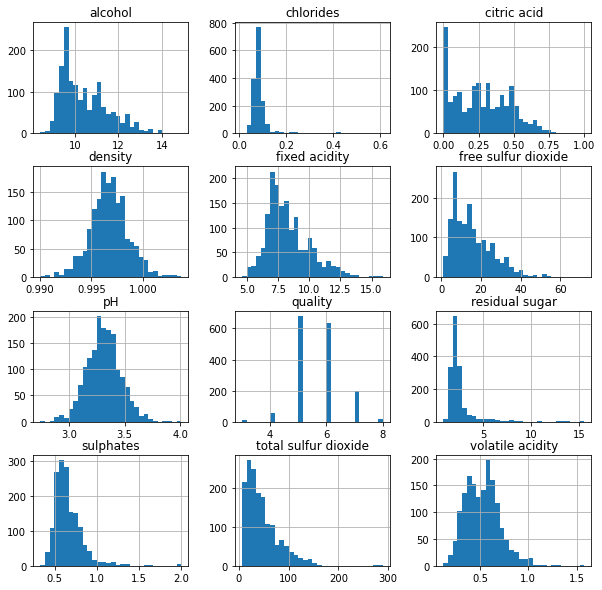

In [5]:
%matplotlib inline
wine_df.hist(bins=30, figsize=(10,10))
plt.show()

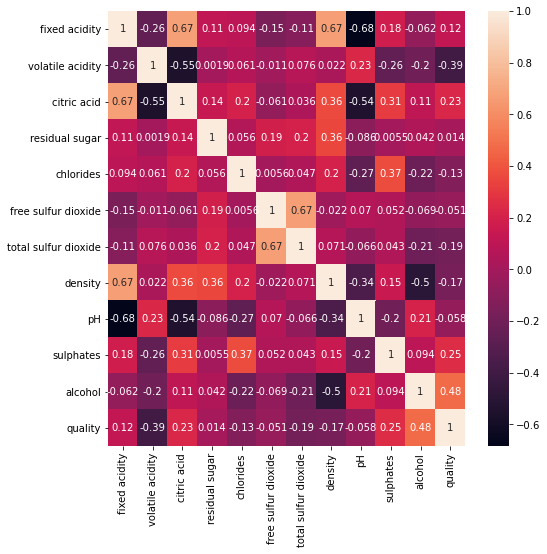

In [6]:
# show correlation
correlation = wine_df.corr()
fig, ax = plt.subplots(figsize=(8,8))
sns.heatmap(correlation,annot=True,ax=ax)

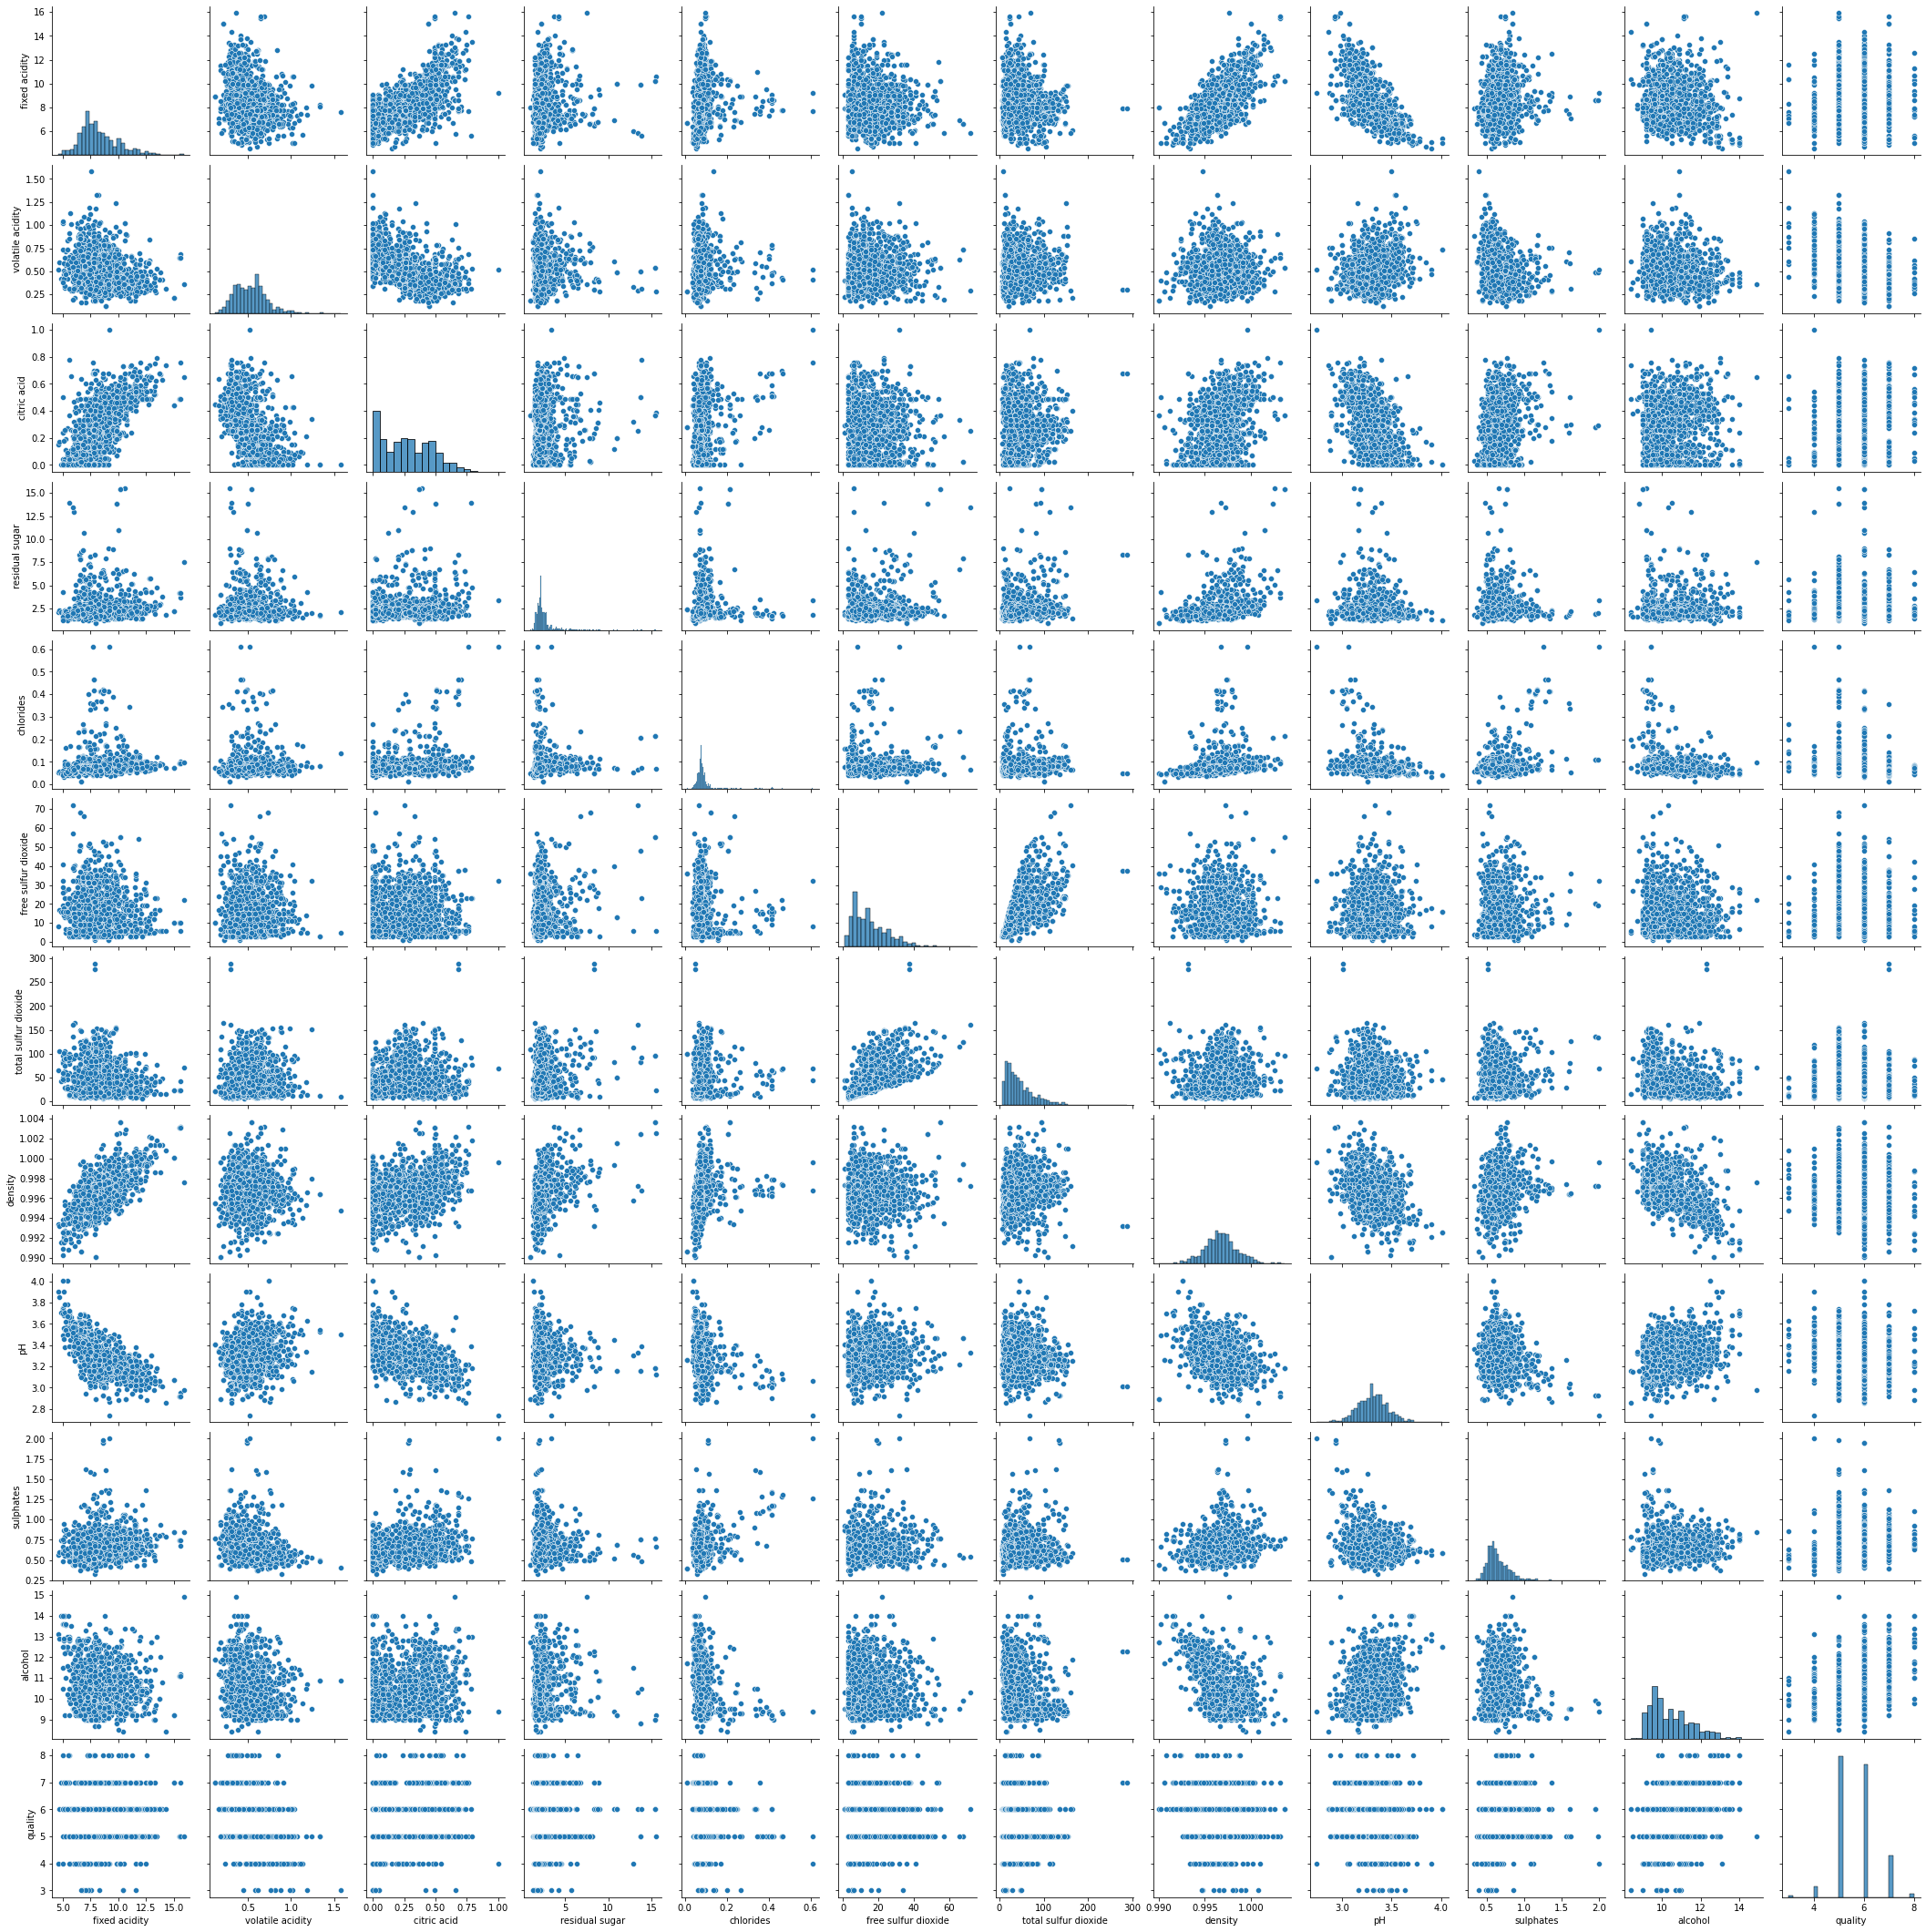

In [7]:
%matplotlib inline
sns.pairplot(wine_df)

In [8]:
#train test split
X_wine_train, X_wine_test,y_wine_train, y_wine_test = sklearn.model_selection.train_test_split(wine_df.drop(columns=["quality"]),wine_df.quality,test_size = 0.3, random_state=1981)
X_wine_train.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
891,7.2,0.660,0.03,2.3,0.078,16.0,86.0,0.99743,3.53,0.57,9.7
1348,7.2,0.655,0.03,1.8,0.078,7.0,12.0,0.99587,3.34,0.39,9.5
862,7.5,0.420,0.32,2.7,0.067,7.0,25.0,0.99628,3.24,0.44,10.4
724,7.5,1.115,0.10,3.1,0.086,5.0,12.0,0.99580,3.54,0.60,11.2
1499,6.9,0.740,0.03,2.3,0.054,7.0,16.0,0.99508,3.45,0.63,11.5


In [9]:
#double check the dimensions
print(X_wine_train.shape)
print(X_wine_test.shape)
print(y_wine_test.shape)
print(y_wine_train.shape)

(1119, 11)
(480, 11)
(480,)
(1119,)


### Model Building

In [10]:
#KNN Classifier
knn_class_pipe = make_pipeline(StandardScaler(),PCA(), KNeighborsClassifier())
param_grid = {'pca__n_components': [4,5,6,7,9,11],"kneighborsclassifier__n_neighbors": list(range(3,51,2)),"kneighborsclassifier__p": [1,2]}

# knn_class_pipe = make_pipeline(StandardScaler(), KNeighborsClassifier())
# param_grid = {"kneighborsclassifier__n_neighbors": list(range(3,51,4)),"kneighborsclassifier__p": [1,2]}

# gs = GridSearchCV(estimator=knn_class_pipe, param_grid=param_grid,scoring='f1_macro', return_train_score=True)
gs = GridSearchCV(estimator=knn_class_pipe, param_grid=param_grid,scoring='accuracy', return_train_score=True)
gs.fit(X_wine_train, y_wine_train.values.ravel())

GridSearchCV(estimator=Pipeline(steps=[('standardscaler', StandardScaler()),
                                       ('pca', PCA()),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             param_grid={'kneighborsclassifier__n_neighbors': [3, 5, 7, 9, 11,
                                                               13, 15, 17, 19,
                                                               21, 23, 25, 27,
                                                               29, 31, 33, 35,
                                                               37, 39, 41, 43,
                                                               45, 47, 49],
                         'kneighborsclassifier__p': [1, 2],
                         'pca__n_components': [4, 5, 6, 7, 9, 11]},
             return_train_score=True, scoring='accuracy')

In [13]:
print(f"Best Score: {gs.best_score_}")
best_est = gs.best_estimator_.fit(X_wine_train,y_wine_train)
y_wine_pred = best_est.predict(X_wine_train)
print(f"Accuracy after refit: {metrics.accuracy_score(y_wine_train, y_wine_pred)}")

Best Score: 0.5961082639333759
Accuracy after refit: 0.6076854334226989


In [14]:
gs.best_params_

{'kneighborsclassifier__n_neighbors': 37,
 'kneighborsclassifier__p': 2,
 'pca__n_components': 11}

#### Learning Curve

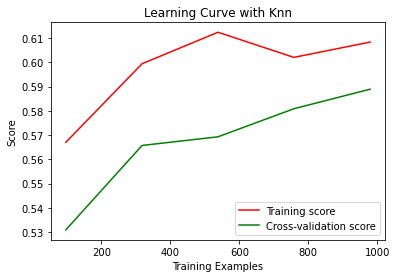

In [15]:
#Learning Curve

sizes, tr_scores, ts_scores = learning_curve(best_est, X_wine_train, y_wine_train.values.ravel(), cv=8)

tr_scores_mean = np.mean(tr_scores, axis=1)
ts_scores_mean = np.mean(ts_scores, axis=1)

plt.title("Learning Curve with Knn")
plt.xlabel("Training Examples")
plt.ylabel("Score")
plt.plot( sizes,tr_scores_mean, label="Training score",
             color="red")
plt.plot(sizes,ts_scores_mean, label="Cross-validation score",
             color="green")
plt.legend(loc="best")
plt.show()

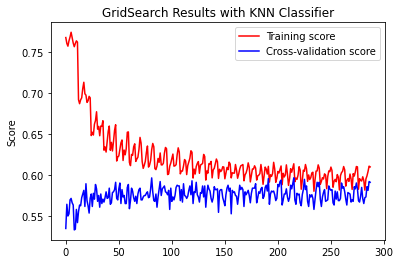

In [16]:
tr_score_mean = gs.cv_results_['mean_train_score']
ts_score_mean = gs.cv_results_['mean_test_score']

plt.title("GridSearch Results with KNN Classifier")
plt.ylabel("Score")
plt.plot( tr_score_mean, label="Training score",
             color="red")
plt.plot(ts_score_mean, label="Cross-validation score",
             color="blue")
plt.legend(loc="best")
plt.show()

### Confusion Matrix

training set

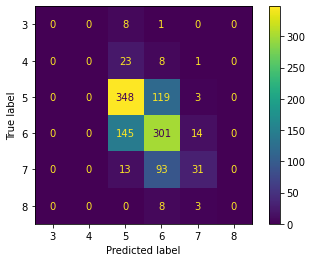

In [17]:
metrics.plot_confusion_matrix(best_est, X_wine_train, y_wine_train)

Test Set

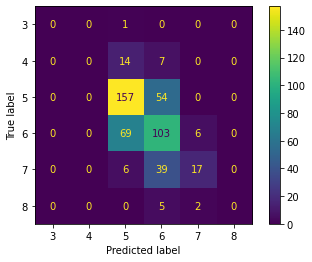

In [18]:
metrics.plot_confusion_matrix(best_est, X_wine_test, y_wine_test)

In [19]:
y_wine_test_pred = best_est.predict(X_wine_test)
metrics.accuracy_score(y_wine_test,y_wine_test_pred)

0.5770833333333333